In this notebook, I will walk through an analysis of speeches by the first three American presidents: George Washington, John Adams, and Thomas Jefferson.  

These presidents were chosen for several reasons.  They are all contemporaries of each other, and thus theoretically wrote speeches using similar language patterns.  The fact that they peformed these speeches more than 200 years ago adds an extra layer of challenge, as many of the phrases and words chosen are not commonly found in modern written communication.  Lastly, though they were all Founding Fathers, their levels of education, political philosophy, and temperaments were all very different. I will ultimately try to see if I can predict which of the founding fathers wrote a given sentance.  But first there is data collection and pre-processing to do.

I begin by importing the necessary libraries:

In [122]:
import pandas as pd
import nltk.tokenize
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Included in the same folder as this Jupyter notebook is a python file named "speech_collection.py" which scrapes text data of presidential speeches of our three presidents from the Miller Center at the University of Virginia (https://millercenter.org/the-presidency/presidential-speeches).

The speeches are then saved as three dataframes, one for each president, with a column for the date of the speech and a column for the text of the speech.  These dataframes are then saved as .csv files and loaded into the notebook below.

In [3]:
speech_output = subprocess.run(["python", "speech_collection.py"], capture_output=True, text=True)

In [4]:
speech_output.stdout


"DataFrames saved to ('washington_speeches.csv', 'adams_speeches.csv', 'jefferson_speeches.csv')\n"

In [5]:
washington_df = pd.read_csv('washington_speeches.csv')
adams_df = pd.read_csv('adams_speeches.csv')
jefferson_df = pd.read_csv('jefferson_speeches.csv')

The first few columns of each of these dataframes appears as such:

In [6]:
washington_df.head()

,Speech_Date,Speech_Text
0,1789-04-30,Fellow Citizens of the Senate and the House of...
1,1789-10-03,Whereas it is the duty of all Nations to ackno...
2,1790-01-08,Fellow Citizens of the Senate and House of Rep...
3,1790-12-08,Fellow citizens of the Senate and House of Re...
4,1790-12-29,"I the President of the United States, by my o..."


The following steps involves a series of processing steps that convert the dataframe of presidential speeches into a more useable form.  
-First we convert all uppercase letters to lowercase in the speech dataframe
-Then we tokenize each speech into a new column of the dataframe for sentance sized tokens and word sized tokens.

In [33]:
df_list = [washington_df, adams_df, jefferson_df]

def remove_punct(tokenized_speech):
    return [word for word in tokenized_speech if word.isalpha()]

for df in df_list:
    df['Speech_Text'] = df['Speech_Text'].apply(str.lower)
    df['Sentence_Tokens'] = df['Speech_Text'].apply(nltk.sent_tokenize)
    df['Word_Tokens'] = df['Speech_Text'].apply(nltk.word_tokenize)
    df['Word_Tokens'] = df['Word_Tokens'].apply(remove_punct)

Now that each speech as been separated into sentence and word tokens, some more interesting analysis can be done.  Note that a remove_punct function was included to eliminate any punctuation that is treated as a word by the nltk.word_tokenize function.  

Our dataframes now appear as such:

In [35]:
washington_df.head()

,Speech_Date,Speech_Text,Sentence_Tokens,Word_Tokens
0,1789-04-30,fellow citizens of the senate and the house of...,[fellow citizens of the senate and the house o...,"[fellow, citizens, of, the, senate, and, the, ..."
1,1789-10-03,whereas it is the duty of all nations to ackno...,[whereas it is the duty of all nations to ackn...,"[whereas, it, is, the, duty, of, all, nations,..."
2,1790-01-08,fellow citizens of the senate and house of rep...,[fellow citizens of the senate and house of re...,"[fellow, citizens, of, the, senate, and, house..."
3,1790-12-08,fellow citizens of the senate and house of re...,[ fellow citizens of the senate and house of r...,"[fellow, citizens, of, the, senate, and, house..."
4,1790-12-29,"i the president of the united states, by my o...","[ i the president of the united states, by my ...","[i, the, president, of, the, united, states, b..."


where elements in the new columns are lists filled with sentences or words, respectively.

Now that the speeches have been tokenized into sentences and words, new forms of anlysis can be applied. For example, we can track statistics regarding average word size or apply a sentiment analyzer to each sentence.    


First, a slight rearrangement of the data will make our analysis easier.  Rather than have three data frames for each president, organized by the date of the speech,  I'd like to have one data frame that stores individual sentences labeled by president.

Below is a function that extracts all sentences from a given presidential data frame

In [47]:
def combine_sentence_lists(df_column):
    num_lists = len(df_column)
    total_list = []
    list_num = 0
    while list_num < num_lists:
        num_sentences = len(df_column.iloc[list_num])
        sentence_num = 0
        while sentence_num < num_sentences:
            total_list.append(df_column.iloc[list_num][sentence_num].lower())
            sentence_num += 1
        list_num += 1
    return total_list

In [50]:

washington_sentence_list = combine_sentence_lists(washington_df['Sentence_Tokens'])
adams_sentence_list = combine_sentence_lists(adams_df['Sentence_Tokens'])
jefferson_sentence_list = combine_sentence_lists(jefferson_df['Sentence_Tokens'])

In [71]:
def populate_name_list(num_entries, name):
    name_list = []
    for num in range(num_entries):
        name_list.append(name)
    return name_list
    
washington_name_list = populate_name_list(len(washington_sentence_list), 'Washington')
adams_name_list = populate_name_list(len(adams_sentence_list), 'Adams')
jefferson_name_list = populate_name_list(len(jefferson_sentence_list), 'Jefferson')
   

In [76]:
president_name_list = washington_name_list + adams_name_list + jefferson_name_list
president_sentence_list = washington_sentence_list + adams_sentence_list + jefferson_sentence_list
president_data = {'Name':president_name_list, 'Sentence':president_sentence_list}

In [77]:
president_df = pd.DataFrame(president_data)

In [79]:
president_df.tail()

,Name,Sentence
1871,Jefferson,the part which i have acted on the theatre of ...
1872,Jefferson,"of you then, my neighbors, i may ask, in the f..."
1873,Jefferson,"whom have i oppressed, or of whose hand have i..."
1874,Jefferson,on your verdict i rest with conscious security.
1875,Jefferson,your wishes for my happiness are received with...


We now have a single dataframe that labels individual sentences by their author.  As a next step, I will run a simple analysis to determine the number of words in each sentence and the average length of the words in each sentence, both with punctuation removed.

In [82]:
president_df['Words'] = president_df['Sentence'].apply(nltk.word_tokenize)
president_df['Words'] = president_df['Words'].apply(remove_punct)

In [83]:
president_df

,Name,Sentence,Words
0,Washington,fellow citizens of the senate and the house of...,"[fellow, citizens, of, the, senate, and, the, ..."
1,Washington,"on the one hand, i was summoned by my country,...","[on, the, one, hand, i, was, summoned, by, my,..."
2,Washington,"on the other hand, the magnitude and difficult...","[on, the, other, hand, the, magnitude, and, di..."
3,Washington,"in this conflict of emotions, all i dare aver,...","[in, this, conflict, of, emotions, all, i, dar..."
4,Washington,"all i dare hope, is, that, if in executing thi...","[all, i, dare, hope, is, that, if, in, executi..."
...,...,...,...
1871,Jefferson,the part which i have acted on the theatre of ...,"[the, part, which, i, have, acted, on, the, th..."
1872,Jefferson,"of you then, my neighbors, i may ask, in the f...","[of, you, then, my, neighbors, i, may, ask, in..."
1873,Jefferson,"whom have i oppressed, or of whose hand have i...","[whom, have, i, oppressed, or, of, whose, hand..."
1874,Jefferson,on your verdict i rest with conscious security.,"[on, your, verdict, i, rest, with, conscious, ..."


Now to create a column counting the number of words in each sentence.

In [84]:
president_df['Word_Count'] = president_df['Words'].apply(len)

In [100]:
president_df.head()

,Name,Sentence,Words,Word_Count
0,Washington,fellow citizens of the senate and the house of...,"[fellow, citizens, of, the, senate, and, the, ...",46
1,Washington,"on the one hand, i was summoned by my country,...","[on, the, one, hand, i, was, summoned, by, my,...",87
2,Washington,"on the other hand, the magnitude and difficult...","[on, the, other, hand, the, magnitude, and, di...",69
3,Washington,"in this conflict of emotions, all i dare aver,...","[in, this, conflict, of, emotions, all, i, dar...",34
4,Washington,"all i dare hope, is, that, if in executing thi...","[all, i, dare, hope, is, that, if, in, executi...",87


To get a sense if word count could be used to distiguish sentences written by each president, I will calclate the mean, standard deviation, and non-parametric skew of the word count all sentences written by each president.

In [111]:
washington_mean_wc = president_df[president_df['Name'] == 'Washington']['Word_Count'].mean()
adams_mean_wc = president_df[president_df['Name'] == 'Adams']['Word_Count'].mean()
jefferson_mean_wc = president_df[president_df['Name'] == 'Jefferson']['Word_Count'].mean()

print(f"Washington's mean word count is: {washington_mean_wc:.2f}")
print(f"Adams' mean word count is: {adams_mean_wc:.2f}")
print(f"Jefferson's mean word count is: {jefferson_mean_wc:.2f}")

Washington's mean word count is: 43.02
Adams' mean word count is: 44.64
Jefferson's mean word count is: 43.95


Looking at just the mean word count in a sentence, there is little difference across each of the three presidents.  Let's progress to the standard deviation in a similar manner.  

In [112]:
washington_std_wc = president_df[president_df['Name'] == 'Washington']['Word_Count'].std()
adams_std_wc = president_df[president_df['Name'] == 'Adams']['Word_Count'].std()
jefferson_std_wc = president_df[president_df['Name'] == 'Jefferson']['Word_Count'].std()

print(f"Washington's word count standard deviation is: {washington_std_wc:.2f}")
print(f"Adams' word count standard deviation is: {adams_std_wc:.2f}")
print(f"Jefferson's word count standard deviation is: {jefferson_std_wc:.2f}")

Washington's word count standard deviation is: 47.94
Adams' word count standard deviation is: 52.26
Jefferson's word count standard deviation is: 39.68


This information is slightly more revealing, as it demonstrates that that range of words per sentence for both John Adams and George Washington are relatively higher that that of Thomas Jefferson.  The slightly lower standard deviation of word count per sentence of Thomas Jefferson indicates that there is less variation in word count in his sentences compared to the other two presidents. 

Lastly for the word count column, I will calculate the non-parametric skew for word counts per sentence written by each president.  The non-parametric skew is a measure of the positive or negative skew of the underlying distribuiton, where a skew of 0 indicates that the distribution is symetrical.  It can be calculated by the formula (mean-median)/std

In [115]:
washington_median_wc = president_df[president_df['Name'] == 'Washington']['Word_Count'].median()
adams_median_wc = president_df[president_df['Name'] == 'Adams']['Word_Count'].median()
jefferson_median_wc = president_df[president_df['Name'] == 'Jefferson']['Word_Count'].median()


washington_np_skew_wc = (washington_mean_wc-washington_median_wc)/washington_std_wc
adams_np_skew_wc = (adams_mean_wc-adams_median_wc)/adams_std_wc
jefferson_np_skew_wc = (jefferson_mean_wc-jefferson_median_wc)/jefferson_std_wc

print(f"Washington's word count non-parametric skew is: {washington_np_skew_wc:.2f}")
print(f"Adams' word count non-parametric skew is: {adams_np_skew_wc:.2f}")
print(f"Jefferson's word count non-parametric_skew is: {jefferson_np_skew_wc:.2f}")

Washington's word count non-parametric skew is: 0.21
Adams' word count non-parametric skew is: 0.18
Jefferson's word count non-parametric_skew is: 0.23


The calculated skews are all very similar and provide little additional insight.  The findings thus far can be summarized by visualizing the word count in a histogram.

(0.0, 300.0)

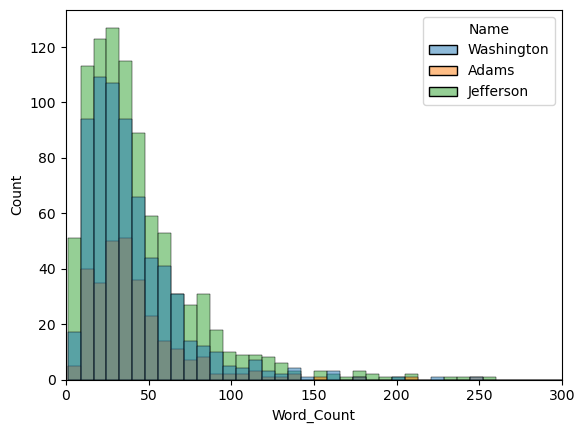

In [120]:
sns.histplot(data=president_df, x='Word_Count', hue='Name', bins=100)
plt.xlim(0,300)

The significant overlap and similar distribuitons reflect the minor differences we measured in the calculated statistics of the word counts from each sentence.  

In a similar way, we now look to measure the average length of words in a given sentence to get insight into whether a president tends to use longer or shorter words in their speeches.  To do this, we need to create a function that calucluates the average word length in a sentence. 

In [127]:
def calc_word_length(word_list):
    word_lengths = []
    for word in word_list:
        word_lengths.append(len(word))
    return round(np.mean(word_lengths), 2)

president_df['Average_Word_Length'] = president_df['Words'].apply(calc_word_length)

In [128]:
president_df.tail()

,Name,Sentence,Words,Word_Count,Average_Word_Length
1871,Jefferson,the part which i have acted on the theatre of ...,"[the, part, which, i, have, acted, on, the, th...",65,4.40
1872,Jefferson,"of you then, my neighbors, i may ask, in the f...","[of, you, then, my, neighbors, i, may, ask, in...",23,3.57
1873,Jefferson,"whom have i oppressed, or of whose hand have i...","[whom, have, i, oppressed, or, of, whose, hand...",18,4.11
1874,Jefferson,on your verdict i rest with conscious security.,"[on, your, verdict, i, rest, with, conscious, ...",8,4.88
1875,Jefferson,your wishes for my happiness are received with...,"[your, wishes, for, my, happiness, are, receiv...",21,5.10


(3.0, 7.0)

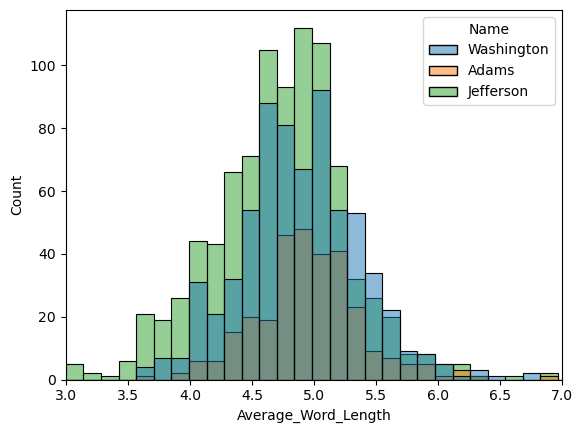

In [133]:
sns.histplot(data=president_df, x='Average_Word_Length', hue='Name', bins=40)
plt.xlim(3, 7)

Without calculating the mean, standard deviation, and skew of the average word length per sentence, it is reasonably clear that there is significant overlap between the three presidents, and this feature is unlikely to provide much differentiation.  

Rather than look at word and sentence level statistics, let see if a simple sentiment analysis could provide insight into the styles of the three presidents.  

This will be done using the VADER sentiment analysis from the nltk library, and is best used on text such as social media posts or customer reviews.  Given its ease of use, we will test it on language written ~250 years ago with the understanding that its absolute accuracy may be imperfect.  

The following sentiment analyzer functions output a list of positive and negative sentiment level scores in a list for each sentence input. 

In [196]:
def pos_sentiment_analysis(sentence):
    from nltk.sentiment import SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    sent_dict = sia.polarity_scores(sentence)
    pos_sent = sent_dict['pos']
    return pos_sent

def neg_sentiment_analysis(sentence):
    from nltk.sentiment import SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()
    sent_dict = sia.polarity_scores(sentence)
    neg_sent = sent_dict['neg']
    return neg_sent

In [197]:
president_df['Positive_Sent'] = president_df['Sentence'].apply(pos_sentiment_analysis)
president_df['Negative_Sent'] = president_df['Sentence'].apply(neg_sentiment_analysis)

In [198]:
president_df.head()

,Name,Sentence,Words,Word_Count,Average_Word_Length,Negative_Sent,Positive_Sent
0,Washington,fellow citizens of the senate and the house of...,"[fellow, citizens, of, the, senate, and, the, ...",46,5.04,0.077,0.051
1,Washington,"on the one hand, i was summoned by my country,...","[on, the, one, hand, i, was, summoned, by, my,...",87,4.36,0.068,0.267
2,Washington,"on the other hand, the magnitude and difficult...","[on, the, other, hand, the, magnitude, and, di...",69,5.22,0.116,0.105
3,Washington,"in this conflict of emotions, all i dare aver,...","[in, this, conflict, of, emotions, all, i, dar...",34,4.26,0.102,0.163
4,Washington,"all i dare hope, is, that, if in executing thi...","[all, i, dare, hope, is, that, if, in, executi...",87,4.66,0.027,0.196


(0.0, 0.5)

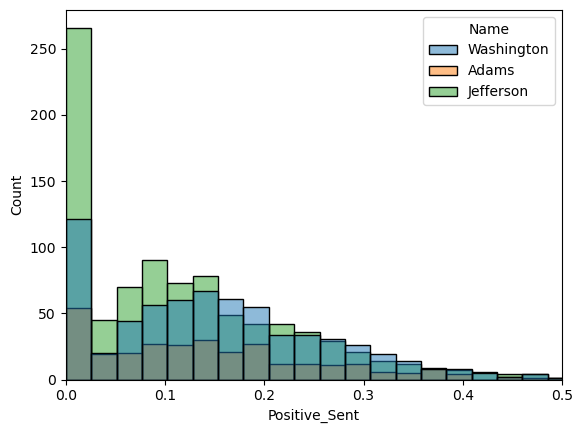

In [230]:
sns.histplot(data=president_df, x='Positive_Sent', hue='Name', bins=30)
plt.xlim(0,0.5)

(0.0, 0.5)

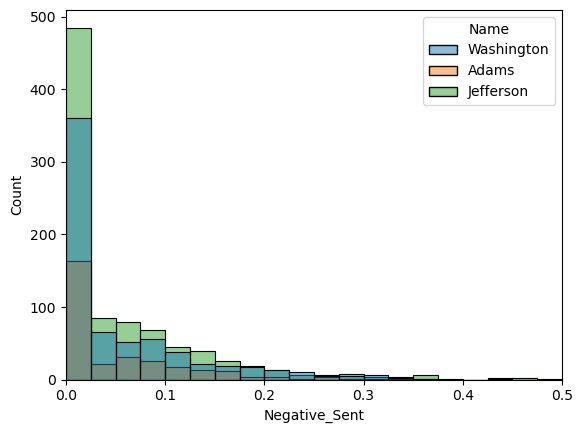

In [232]:
sns.histplot(data=president_df, x='Negative_Sent', hue='Name', bins=40)
plt.xlim(0,0.5)


By plotting the distribution of positive and negative sentiments calculated from each sentence, we see little appreciable difference between the three presidents for either positive or negative sentiments.  Either a more sophisticated se